# Задание 2 (Вариант 5 - оборот МСП)	

## Предобработка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("ex2_upd.xlsx")

In [2]:
# Переименовываем Region__nan в Region
df.rename(columns={'Region__nan': 'Region'}, inplace=True)

# Разворачиваем данные в длинный формат
df_melted = df.melt(id_vars=['Region'], var_name='Indicator_Year', value_name='Value')

# Разделяем колонку Indicator_Year на Indicator и Year
df_melted[['Indicator', 'Year']] = df_melted['Indicator_Year'].str.rsplit('_', n=2, expand=True).iloc[:, :2]

# Удаляем лишние колонки
df_melted = df_melted.drop(columns='Indicator_Year')

# Поворачиваем таблицу в нужный формат
result = df_melted.pivot_table(index=['Region', 'Year'], columns='Indicator', values='Value').reset_index()

# Убираем MultiIndex у столбцов
result.columns.name = None

# Сортируем
result = result.sort_values(by=['Region', 'Year'])

result = result[result['Year'] != ""]

result['Year'] = pd.to_numeric(result['Year'], errors='coerce')

result = result.set_index(['Region', 'Year'])

In [3]:
result

InvestFC  Rabotniki   SubMSP  \
Region                          Year                                     
Алтайский край                  16    2.260857e+10   263673.0  77860.0   
                                17    1.665463e+10   222950.0  78258.0   
                                18    2.317985e+10   225284.0  78723.0   
Амурская область                16    1.419203e+10    85504.0  26942.0   
                                17    1.502950e+10    74273.0  26712.0   
...                                            ...        ...      ...   
Ямало-Ненецкий автономный округ 17    2.861205e+09    45008.0  18293.0   
                                18    2.836850e+09    44306.0  18393.0   
Ярославская область             16    7.472638e+09   140428.0  54594.0   
                                17    1.052519e+10   160412.0  52988.0   
                                18    1.317786e+10   161317.0  54584.0   

                                      Vnovsozd  biznav           budg  \
Region                          Year                                    
Алтайский край                  16     11718.0    50.0   83045.092458   
                                17     11949.0    53.0   89688.699855   
                                18     12370.0    76.0   95697.842745   
Амурская область                16      3749.0    34.0   48534.136869   
                                17      3710.0    36.0   52416.867819   
...                                        ...     ...            ...   
Ямало-Ненецкий автономный округ 17      2517.0   132.0  143244.768835   
                                18      2886.0   434.0  152842.168347   
Ярославская область             16     10557.0   126.0   53248.674483   
                                17      9174.0   132.0   57508.568442   
                                18      9384.0   239.0   61361.642527   

                                           corpmsp  do30mer  edu30  \
Region                          Year                                 
Алтайский край                  16    1.944759e+09      0.0    NaN   
                                17    2.400937e+09    500.0    NaN   
                                18    1.890684e+09   2800.0    NaN   
Амурская область                16    9.921222e+05      0.0    NaN   
                                17    7.123240e+05      0.0    NaN   
...                                            ...      ...    ...   
Ямало-Ненецкий автономный округ 17    4.294837e+07   1320.0    NaN   
                                18    5.184993e+07   2230.0    NaN   
Ярославская область             16    8.007370e+08   6000.0    NaN   
                                17    5.455711e+08    408.0    NaN   
                                18    6.393331e+08      0.0    NaN   

                                           fedsub  ...  newrabmesta  \
Region                          Year               ...                
Алтайский край                  16    158385000.0  ...        1.313   
                                17    127666500.0  ...        0.706   
                                18    104584200.0  ...        0.342   
Амурская область                16     72010000.0  ...        0.379   
                                17     65439500.0  ...        0.228   
...                                           ...  ...          ...   
Ямало-Ненецкий автономный округ 17     28700000.0  ...        0.110   
                                18     27798200.0  ...        0.081   
Ярославская область             16     53695000.0  ...        0.826   
                                17     43816420.0  ...        0.374   
                                18     39024600.0  ...        0.249   

                                            oborot  regsof           rgo  \
Region                          Year                                       
Алтайский край                  16    6.933102e+11    0.09  8.739152e+08   
                                17    5.479026e+11    0.09  8.9027

In [4]:
# Добавляем таргет для второй модели
result['oborot k naselenie'] = result['oborot'] / result['naselenie']

# Добавляем третий таргет (Домножаем на 1 000 000, тк ВРП у нас измерен в миллионах, а оборот в рублях)
result['oborot k vrp'] = result['oborot'] / (result['vrp'] * 1000000)

In [5]:
result = result.dropna(axis=1, how='all')
result.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 255 entries, ('Алтайский край', 16) to ('Ярославская область', 18)
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   InvestFC            255 non-null    float64
 1   Rabotniki           255 non-null    float64
 2   SubMSP              255 non-null    float64
 3   Vnovsozd            255 non-null    float64
 4   biznav              255 non-null    float64
 5   budg                255 non-null    float64
 6   corpmsp             255 non-null    float64
 7   do30mer             255 non-null    float64
 8   fedsub              255 non-null    float64
 9   im                  255 non-null    float64
 10  infrmoney           255 non-null    float64
 11  infrrazv            255 non-null    float64
 12  mfc                 255 non-null    float64
 13  minekfed            255 non-null    float64
 14  minekreg            255 non-null    float64
 15  mspbank     

## Визуализация

### Графики

### Карта OSM

#### Заполнение координатами

In [7]:
# Берем датасет с координатами (который мы создали при выполнении задания 1) и сопоставляем с теми регионами, что есть в текущем df
region_counts = pd.read_csv("coordsUpd.csv") 
region_counts = region_counts.drop(columns="Unnamed: 0")

# Преобразуем координаты в список, тк они сохранились у нас строкой
import ast
def convert_to_list(coord_str):
    try:
        # Используем ast.literal_eval для преобразования строки в список
        return ast.literal_eval(coord_str)
    except (ValueError, SyntaxError):
        print(f"Ошибка преобразования для {coord_str}")
        return None

# Применяем функцию к столбцу с координатами
region_counts["coordinates"] = region_counts["coordinates"].apply(convert_to_list)

In [7]:
# Объединяем с координатами по региону
filered_df = result[['oborot']]
filered_df = filered_df.reset_index()

result_for_map = pd.merge(filered_df, region_counts, left_on='Region', right_on='a3', how='left')

#### API 

In [237]:
# Тк сопоставились не все регионы, добавим оставшиеся через реквесты на 
result_for_map['coordinates'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
250     True
251     True
252    False
253    False
254    False
Name: coordinates, Length: 255, dtype: bool

In [8]:
missing_coords = result_for_map[result_for_map['coordinates'].isna()]
# находим те регионы, которы не сопоставились
missed_reg = set()
for i in list(missing_coords["Region"]):
    missed_reg.add(i)

In [247]:
# Заменяем краткое наименование региона на полное - АПИшка работает только с полными наименованиями
missed_reg = {"Ненецкий автономный округ" if x == "Ненецкий АО" else x for x in missed_reg}

In [240]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapi")

# Функция для получения координат
def get_coordinates(region_name):
    try:
        location = geolocator.geocode(region_name + ", Россия")  # Добавляем адрес
        if location:
            return [location.latitude, location.longitude]  # Возвращаем координаты
        else:
            return None  # Если координаты не найдены
    except Exception as e:
        print(f"Ошибка для {region_name}: {e}")
        return None

In [249]:
missed_coords = list()
# Заполним список координатами
for i in missed_reg:
    missed_coords.append((i, get_coordinates(i)))

In [250]:
missed_coords

[('Псковская область', [57.5358729, 28.8586826]),
 ('Ненецкий автономный округ', [67.6783253, 57.0626853]),
 ('Ханты-Мансийский автономный округ - Югра', [61.8793428, 68.6418156]),
 ('Еврейская автономная область', [48.5601613, 132.2775662]),
 ('Ямало-Ненецкий автономный округ', [67.1471631, 74.3415488]),
 ('Чукотский автономный округ', [66.0006475, 169.4900869])]

In [251]:
import numpy as np
missed_dict = dict(missed_coords)

missed_dict["Ненецкий АО"] = missed_dict["Ненецкий автономный округ"]

# Обновляем координаты
result_for_map['coordinates'] = result_for_map.apply(
    lambda row: missed_dict[row['Region']] 
    if isinstance(row['coordinates'], float) and row['Region'] in missed_dict
    else row['coordinates'],
    axis=1
)

result_for_map = result_for_map.drop(columns="a3")

In [255]:
result_for_map.to_csv('result_for_map.csv') # полученный датасет мы прикрепили к заданию, можно сразу прочитать его
result_for_map

,Region,Year,oborot,coordinates
0,Алтайский край,16,6.933102e+11,"[52.6932243, 82.6931424]"
1,Алтайский край,17,5.479026e+11,"[52.6932243, 82.6931424]"
2,Алтайский край,18,6.031799e+11,"[52.6932243, 82.6931424]"
3,Амурская область,16,2.110497e+11,"[52.8032368, 128.437295]"
4,Амурская область,17,1.645900e+11,"[52.8032368, 128.437295]"
...,...,...,...,...
250,Ямало-Ненецкий автономный округ,17,1.125756e+11,"[67.1471631, 74.3415488]"
251,Ямало-Ненецкий автономный округ,18,1.188368e+11,"[67.1471631, 74.3415488]"
252,Ярославская область,16,4.979056e+11,"[57.7781976, 39.0021095]"
253,Ярославская область,17,3.705526e+11,"[57.7781976, 39.0021095]"


#### Без API

In [8]:
import ast
def convert_to_list(coord_str):
    try:
        # Используем ast.literal_eval для преобразования строки в список
        return ast.literal_eval(coord_str)
    except (ValueError, SyntaxError):
        print(f"Ошибка преобразования для {coord_str}")
        return None

result_for_map = pd.read_csv('result_for_map.csv') # Мы по апи собрали данные, записали их в датасет, можно его использовать сразу готовый

result_for_map["coordinates"] = result_for_map["coordinates"].apply(convert_to_list)

#### Карта

In [9]:
import folium
from folium.plugins import TimestampedGeoJson

data = result_for_map.copy()
# Рассчитываем квартильные границы по годам
quartiles_by_year = data.groupby('Year')['oborot'].quantile([0.25, 0.5, 0.75]).unstack()

# Функции для цвета и радиуса
def get_color(value, year):
    q1, q2, q3 = quartiles_by_year.loc[year]
    if value <= q1:
        return '#bfcc2f' 
    elif value <= q2:
        return '#2fcc8b' 
    elif value <= q3:
        return '#41b6c4'
    else:
        return '#253494'

def get_radius(value, year):
    q1, q2, q3 = quartiles_by_year.loc[year]
    if value <= q1:
        return 5 
    elif value <= q2:
        return 7
    elif value <= q3:
        return 10
    else:
        return 15


m = folium.Map(location=[55, 37], zoom_start=4)

features = []

for i, row in data.iterrows():
    features.append({
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": row['coordinates'][::-1]
        },
        "properties": {
            "time": f"{2000 + row['Year']}-01-01T00:00:00Z",
            "style": {"color": get_color(row['oborot'], row['Year'])},
            "icon": "circle",
            "iconstyle": {
                "fillColor": get_color(row['oborot'], row['Year']),
                "fillOpacity": 0.8,
                "stroke": "true",
                "radius": get_radius(row['oborot'], row['Year'])
            },
            "popup": f"Регион: <b>{row['Region']}</b><br>Год: {2000 + row['Year']}<br>Оборот: {row['oborot'] / 1000000:.2f} млн. рублей"
        }
    })

# Добавляем слой с прокруткой
TimestampedGeoJson(
    {"type": "FeatureCollection", "features": features},
    period="P1Y",               
    add_last_point=False,       
    auto_play=False,
    loop=False,                 
    max_speed=1
).add_to(m)

# Легенда
legend_html = '''
<div style="
    position: fixed; 
    bottom: 50px; left: 50px; width: 240px; height: 130px; 
    background-color: white; z-index:9999; font-size:14px;
    border:2px solid grey; padding: 10px; 
    ">
    <b>Легенда</b><br>
    <i class="fa fa-circle" style="color:#bfcc2f"></i> Значения из 1-го квартиля<br>
    <i class="fa fa-circle" style="color:#2fcc8b"></i> Значения из 2-го квартиля<br>
    <i class="fa fa-circle" style="color:#41b6c4"></i> Значения из 3-го квартиля<br>
    <i class="fa fa-circle" style="color:#253494"></i> Значения из 4-го квартиля<br>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

m

In [10]:
m.save("ex2_map.html")

## Предобработка данных для моделей

In [12]:
# Указываем целевая переменная
target_col = 'oborot'

correlations = result.corr()[target_col].sort_values(ascending=False)
correlation_df = correlations.reset_index()
correlation_df.columns = ['Variable', 'Correlation']

correlation_df


,Variable,Correlation
0,oborot,1.000000
1,budg,0.973670
2,Vnovsozd,0.963431
3,Rabotniki,0.955289
4,vrp,0.954838
5,saldfinresult,0.945764
6,SubMSP,0.936859
7,rgo,0.935877
8,naselenie,0.848403
9,biznav,0.824219


<Axes: >

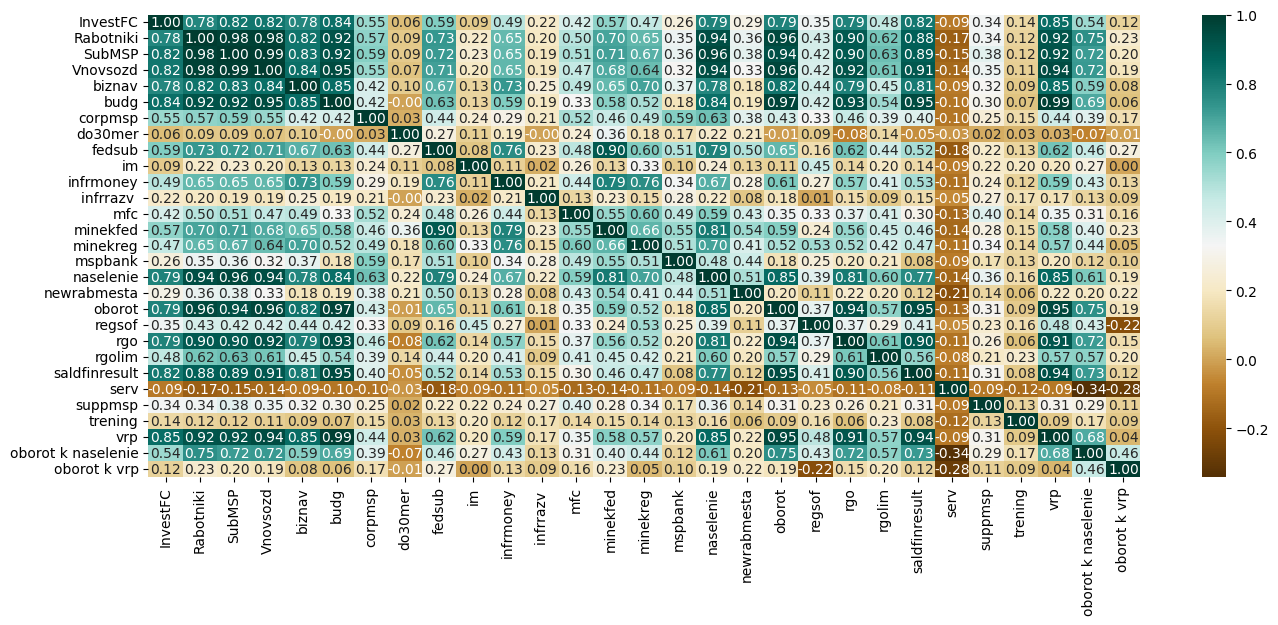

In [13]:
corr_matrix = result.corr()
plt.figure(figsize=(16, 6))
sns.heatmap(corr_matrix, cmap='BrBG', annot=True,fmt=".2f")

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Переменные сильно коррелирующие между собой
X = result[['budg', 
            'Vnovsozd', 
            'Rabotniki', 
            'vrp', 
            'saldfinresult', 
            'SubMSP', 
            'rgo', 
            'naselenie', 
            'biznav', 
            'InvestFC', 
            'oborot k naselenie']]

# Рассчитываем VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Variable,VIF
0,budg,94.631577
1,Vnovsozd,227.519197
2,Rabotniki,61.094604
3,vrp,60.868806
4,saldfinresult,18.609836
5,SubMSP,236.009362
6,rgo,12.731483
7,naselenie,41.884489
8,biznav,4.710912
9,InvestFC,6.444593


Т.к. у нас имеются переменные, которые мультиколлениарны, попробуем применить PCA, чтобы избавиться от мультиколлениарности

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Берем переменные, которые мультиколлениарны
columns_for_PCA = [ 'budg',           #Бюджет субъекта Российской Федерации, млн. руб.
                    'Vnovsozd',       #Вновь созданные МСП, ед.
                    'Rabotniki',      #Работники МСП, чел.
                    'vrp',            #Валовый региональный продукт, млн. руб.
                    'saldfinresult',  #Сальдированный финансовый результат МСП в млн. руб.
                    'SubMSP',        #Количество субъектов МСП, ед.
                    'rgo',           #Объем кредитов, выданных субъектам МСП с привлечением поручительств региональных гарантийных организаций, руб.      
                    'naselenie',     #Население субъекта Российской Федерации, чел.
                    #'biznav',        #Количество МСП, зарегистрированных на Портале Бизнес-навигатора МСП и получивших поддержку с использованием сервисов Бизнес-навигатора МСП, ед.
                    #'InvestFC',      #Инвестиции в основной капитал МСП, руб.
                    #'oborot k naselenie'
                    ]

X = result[columns_for_PCA]

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применяем PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
# Доля объяснённой дисперсии
explained_variance = pca.explained_variance_ratio_
pca_df = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(len(columns_for_PCA))],
    'Explained Variance': explained_variance,
    'Cumulative Variance': explained_variance.cumsum()
})

pca_df

,Component,Explained Variance,Cumulative Variance
0,PC1,0.928167,0.928167
1,PC2,0.042174,0.970341
2,PC3,0.013430,0.983771
3,PC4,0.009128,0.992899
4,PC5,0.003532,0.996431
5,PC6,0.001756,0.998187
6,PC7,0.001404,0.999591
7,PC8,0.000409,1.000000


Первая компонента (PC1) объясняет 92,9% дисперсии, а первые две компоненты в сумме покрывают 97,03%. Это говорит о том, что данные можно хорошо описать с помощью 2 главных компонент.

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [16]:
print(pca.explained_variance_ratio_)

[0.9281675  0.04217367]


In [17]:
# Смотрим, какие переменные взяли в себя компоненты
pca_loadings = pd.DataFrame(
    pca.components_, 
    columns=columns_for_PCA,
    index=['PC1', 'PC2']
)

pca_loadings

,budg,Vnovsozd,Rabotniki,vrp,saldfinresult,SubMSP,rgo,naselenie
PC1,0.357522,0.364151,0.359094,0.356339,0.344511,0.360519,0.346851,0.338642
PC2,-0.293665,0.146311,0.234754,-0.242332,-0.474366,0.277344,-0.278726,0.631576


'budg',           #Бюджет субъекта Российской Федерации, млн. руб.
'Vnovsozd',       #Вновь созданные МСП, ед.
'Rabotniki',      #Работники МСП, чел.
'vrp',            #Валовый региональный продукт, млн. руб.
'saldfinresult',  #Сальдированный финансовый результат МСП в млн. руб.
'SubMSP',        #Количество субъектов МСП, ед.
'rgo',           #Объем кредитов, выданных субъектам МСП с привлечением поручительств региональных гарантийных организаций, руб.      
'naselenie',     #Население субъекта Российской Федерации, чел.

PC1 (Первая компонента):

Сильно нагружена переменными (по сравнению со второй) budg (0,358), Vnovsozd (0,364), Rabotniki (0,359), vrp (0,356), saldfinresult(0,344), SubMSP (0,36), rgo (0,346851).
Это говорит о том, что она отражает общие экономические характеристикаи субъекта, а именно - бюджет субъекта, вновь созданные МСП, работники МСП, врп, количество субъектов мсп и объем кредитов.


PC2 (Вторая компонента):

Наиболее важная переменная — naselenie (0.632).
Данная компонента, по большей части, отражает насленеия субъекта.

In [18]:
# Добавляем компоненты в наш df
result_pca = result.copy()
result_pca['economy_date'] = X_pca[:, 0]
result_pca['demography'] = X_pca[:, 1]
result_pca

InvestFC  Rabotniki   SubMSP  \
Region                          Year                                     
Алтайский край                  16    2.260857e+10   263673.0  77860.0   
                                17    1.665463e+10   222950.0  78258.0   
                                18    2.317985e+10   225284.0  78723.0   
Амурская область                16    1.419203e+10    85504.0  26942.0   
                                17    1.502950e+10    74273.0  26712.0   
...                                            ...        ...      ...   
Ямало-Ненецкий автономный округ 17    2.861205e+09    45008.0  18293.0   
                                18    2.836850e+09    44306.0  18393.0   
Ярославская область             16    7.472638e+09   140428.0  54594.0   
                                17    1.052519e+10   160412.0  52988.0   
                                18    1.317786e+10   161317.0  54584.0   

                                      Vnovsozd  biznav           budg  \
Region                          Year                                    
Алтайский край                  16     11718.0    50.0   83045.092458   
                                17     11949.0    53.0   89688.699855   
                                18     12370.0    76.0   95697.842745   
Амурская область                16      3749.0    34.0   48534.136869   
                                17      3710.0    36.0   52416.867819   
...                                        ...     ...            ...   
Ямало-Ненецкий автономный округ 17      2517.0   132.0  143244.768835   
                                18      2886.0   434.0  152842.168347   
Ярославская область             16     10557.0   126.0   53248.674483   
                                17      9174.0   132.0   57508.568442   
                                18      9384.0   239.0   61361.642527   

                                           corpmsp  do30mer       fedsub  \
Region                          Year                                       
Алтайский край                  16    1.944759e+09      0.0  158385000.0   
                                17    2.400937e+09    500.0  127666500.0   
                                18    1.890684e+09   2800.0  104584200.0   
Амурская область                16    9.921222e+05      0.0   72010000.0   
                                17    7.123240e+05      0.0   65439500.0   
...                                            ...      ...          ...   
Ямало-Ненецкий автономный округ 17    4.294837e+07   1320.0   28700000.0   
                                18    5.184993e+07   2230.0   27798200.0   
Ярославская область             16    8.007370e+08   6000.0   53695000.0   
                                17    5.455711e+08    408.0   43816420.0   
                                18    6.393331e+08      0.0   39024600.0   

                                          im  ...      rgolim  saldfinresult  \
Region                          Year          ...                              
Алтайский край                  16     289.0  ...  22500000.0       31766.00   
                                17     406.0  ...  25000000.0       39936.00   
                                18     651.0  ...  25000000.0       41237.44   
Амурская область                16     535.0  ...  13500000.0       17732.00   
                                17     607.0  ...  15000000.0       22706.00   
...                                      ...  ...         ...            ...   
Ямало-Ненецкий автономный округ 17    2024.0  ...  25000000.0       75850.00   
                                18    2716.0  ...  25000000.0       98000.60   
Ярославская область             16     113.0  ...  20070000.0       59975.00   
                                17     168.0  ...  22300000.0       61596.00   
                                18     304.0  ...  22300000.0       99419.24   

                                          serv  suppmsp    trening  \
Region                       

In [19]:
result_pca_reduced = result_pca.drop(columns=columns_for_PCA) # дропаем колонки, которые относились к PCA

## Гипотезы

- Предиктор InvestFC (Инвестиции в основной капитал МСП, руб.) влияет на оборот МСП в рублях;
- Предиктор biznav (Количество МСП, зарегистрированных на Портале Бизнес-навигатора МСП и получивших поддержку с использованием сервисов Бизнес-навигатора МСП, ед.) влияет на оборот МСП в рублях;
- Предиктор corpmsp (Выдано кредитов с гарантиями и поручительством АО «Корпорация «МСП», руб.) влияет на оборот МСП в рублях;
- Предиктор do30mer (Финансирование мероприятий для повышения количества МСП, созданными физическими лицами до 30 лет, из средств бюджета субъекта Российской Федерации, млн. руб.) влияет на оборот МСП в рублях;
- Предиктор fedsub (Агрегированная сумма федеральной субсидии на развитие МСП, руб.) влияет на оборот МСП в рублях;
- Предиктор im (Количество объектов недвижимости МСП в перечне государственного имущества, ед.) влияет на оборот МСП в рублях;
- Предиктор infrmoney (Выделено организациями инфраструктуры региона на развитие МСП, млн. руб.) влияет на оборот МСП в рублях;
- Предиктор infrrazv (Количество организаций инфраструктуры поддержки МСП в субъекте Российской Федерации, ед.	Организаций инфраструктуры поддержки) влияет на оборот МСП в рублях;
- Предиктор mfc (Количество МСП, которым предоставлены услуги АО "Корпорация "МСП" в МФЦ, ед.) влияет на оборот МСП в рублях;
- Предиктор minekfed (Федеральная субсидия Минэконмразвития субъектам МСП, млн. руб.) влияет на оборот МСП в рублях;
- Предиктор minekreg (Региональная субсидия Минэконмразвития субъектам МСП, млн. руб.) влияет на оборот МСП в рублях;
- Предиктор mspbank ("Выдано кредитов с банковскими гарантиями 
О «МСП Банк», руб."	 влияет на оборот МСП в рублях;
- Предиктор newrabmesta (Созданные новые рабочие места МСП, тыс. чел.) влияет на оборот МСП в рублях;
- Предиктор regsof (Коэффициенты софинансирования расходов бюджетов субъектов Российской Федерации за счет средств федерального бюджета) влияет на оборот МСП в рублях;
- Предиктор rgolim (Лимиты поручительств государственных органов субъектов Российской Федерации по договорам с МСП, руб.) влияет на оборот МСП в рублях;
- Предиктор serv (Доля МСП, открывших/расширивших/продолжающих ведение собственного бизнеса с помощью сервисов маркетинговой и информационной поддержки субъектов МСП, предоставляемых АО "Корпорация "МСП" через портал информационных ресурсов для предпринимателей , создание и ведение которого осуществляет АО "Корпорация "МСП"  в сети "Интернет" по адресу https:/smbn.ru, в общем количестве зарегистрированных на территории субъекта РФ субъектов МСП, в процентах) влияет на оборот МСП в рублях;
- Предиктор suppmsp (Количество МСП, получивших поддержку от организаций инфраструктуры поддержки МСП в субъекте Российской Федерации, ед.) влияет на оборот МСП в рублях;
- Предиктор trening (Общее количество тренингов по программам обучения АО "Корпорация "МСП", проведенных в субъекте Российской Федерации, ед.) влияет на оборот МСП в рублях;
- Предиктор economy_date (главная компонента - общие экономические показатели (таких как  бюджет субъекта, вновь созданные МСП, работники МСП, врп, количество субъектов мсп и объем кредитов)) влияет на оборот МСП в рублях;
- Предиктор demography (Население субъекта Российской Федерации, чел.) влияет на оборот МСП в рублях;


____________________________________________________________________________________________________________



- Предиктор InvestFC (Инвестиции в основной капитал МСП, руб.) влияет на отношение оборота МСП к населению;
- Предиктор biznav (Количество МСП, зарегистрированных на Портале Бизнес-навигатора МСП и получивших поддержку с использованием сервисов Бизнес-навигатора МСП, ед.) влияет на отношение оборота МСП к населению;
- Предиктор corpmsp (Выдано кредитов с гарантиями и поручительством АО «Корпорация «МСП», руб.) влияет на отношение оборота МСП к населению;
- Предиктор do30mer (Финансирование мероприятий для повышения количества МСП, созданными физическими лицами до 30 лет, из средств бюджета субъекта Российской Федерации, млн. руб.) влияет на отношение оборота МСП к населению;
- Предиктор fedsub (Агрегированная сумма федеральной субсидии на развитие МСП, руб.) влияет на отношение оборота МСП к населению;
- Предиктор im (Количество объектов недвижимости МСП в перечне государственного имущества, ед.) влияет на отношение оборота МСП к населению;
- Предиктор infrmoney (Выделено организациями инфраструктуры региона на развитие МСП, млн. руб.) влияет на отношение оборота МСП к населению;
- Предиктор infrrazv (Количество организаций инфраструктуры поддержки МСП в субъекте Российской Федерации, ед.	Организаций инфраструктуры поддержки) влияет на отношение оборота МСП к населению;
- Предиктор mfc (Количество МСП, которым предоставлены услуги АО "Корпорация "МСП" в МФЦ, ед.) влияет на отношение оборота МСП к населению;
- Предиктор minekfed (Федеральная субсидия Минэконмразвития субъектам МСП, млн. руб.) влияет на отношение оборота МСП к населению;
- Предиктор minekreg (Региональная субсидия Минэконмразвития субъектам МСП, млн. руб.) влияет на отношение оборота МСП к населению;
- Предиктор mspbank ("Выдано кредитов с банковскими гарантиями АО «МСП Банк», руб.") влияет на отношение оборота МСП к населению;
- Предиктор newrabmesta (Созданные новые рабочие места МСП, тыс. чел.) влияет на отношение оборота МСП к населению;
- Предиктор regsof (Коэффициенты софинансирования расходов бюджетов субъектов Российской Федерации за счет средств федерального бюджета) влияет на отношение оборота МСП к населению;
- Предиктор rgolim (Лимиты поручительств государственных органов субъектов Российской Федерации по договорам с МСП, руб.) влияет на отношение оборота МСП к населению;
- Предиктор serv (Доля МСП, открывших/расширивших/продолжающих ведение собственного бизнеса с помощью сервисов маркетинговой и информационной поддержки субъектов МСП, предоставляемых АО "Корпорация "МСП" через портал информационных ресурсов для предпринимателей , создание и ведение которого осуществляет АО "Корпорация "МСП"  в сети "Интернет" по адресу https:/smbn.ru, в общем количестве зарегистрированных на территории субъекта РФ субъектов МСП, в процентах) влияет на отношение оборота МСП к населению;
- Предиктор suppmsp (Количество МСП, получивших поддержку от организаций инфраструктуры поддержки МСП в субъекте Российской Федерации, ед.) влияет на отношение оборота МСП к населению;
- Предиктор trening (Общее количество тренингов по программам обучения АО "Корпорация "МСП", проведенных в субъекте Российской Федерации, ед.) влияет на отношение оборота МСП к населению;
- Предиктор economy_date (главная компонента - общие экономические показатели (таких как  бюджет субъекта, вновь созданные МСП, работники МСП, врп, количество субъектов мсп и объем кредитов)) влияет на отношение оборота МСП к населению;
- Предиктор demography (Население субъекта Российской Федерации, чел.) влияет на отношение оборота МСП к населению;



_______________________________________________________________________________________________________

- Предиктор InvestFC (Инвестиции в основной капитал МСП, руб.) влияет на отношение оборота МСП к ВРП;
- Предиктор biznav (Количество МСП, зарегистрированных на Портале Бизнес-навигатора МСП и получивших поддержку с использованием сервисов Бизнес-навигатора МСП, ед.) влияет на отношение оборота МСП к ВРП;
- Предиктор corpmsp (Выдано кредитов с гарантиями и поручительством АО «Корпорация «МСП», руб.) влияет на отношение оборота МСП к ВРП;
- Предиктор do30mer (Финансирование мероприятий для повышения количества МСП, созданными физическими лицами до 30 лет, из средств бюджета субъекта Российской Федерации, млн. руб.) влияет на отношение оборота МСП к ВРП;
- Предиктор fedsub (Агрегированная сумма федеральной субсидии на развитие МСП, руб.) влияет на отношение оборота МСП к ВРП;
- Предиктор im (Количество объектов недвижимости МСП в перечне государственного имущества, ед.) влияет на отношение оборота МСП к ВРП;
- Предиктор infrmoney (Выделено организациями инфраструктуры региона на развитие МСП, млн. руб.) влияет на отношение оборота МСП к ВРП;
- Предиктор infrrazv (Количество организаций инфраструктуры поддержки МСП в субъекте Российской Федерации, ед.	Организаций инфраструктуры поддержки) влияет на отношение оборота МСП к ВРП;
- Предиктор mfc (Количество МСП, которым предоставлены услуги АО "Корпорация "МСП" в МФЦ, ед.) влияет на отношение оборота МСП к ВРП;
- Предиктор minekfed (Федеральная субсидия Минэконмразвития субъектам МСП, млн. руб.) влияет на отношение оборота МСП к ВРП;
- Предиктор minekreg (Региональная субсидия Минэконмразвития субъектам МСП, млн. руб.) влияет на отношение оборота МСП к ВРП;
- Предиктор mspbank ("Выдано кредитов с банковскими гарантиями АО «МСП Банк», руб.") влияет на отношение оборота МСП к ВРП;
- Предиктор newrabmesta (Созданные новые рабочие места МСП, тыс. чел.) влияет на отношение оборота МСП к ВРП;
- Предиктор regsof (Коэффициенты софинансирования расходов бюджетов субъектов Российской Федерации за счет средств федерального бюджета) влияет на отношение оборота МСП к ВРП;
- Предиктор rgolim (Лимиты поручительств государственных органов субъектов Российской Федерации по договорам с МСП, руб.) влияет на отношение оборота МСП к ВРП;
- Предиктор serv (Доля МСП, открывших/расширивших/продолжающих ведение собственного бизнеса с помощью сервисов маркетинговой и информационной поддержки субъектов МСП, предоставляемых АО "Корпорация "МСП" через портал информационных ресурсов для предпринимателей , создание и ведение которого осуществляет АО "Корпорация "МСП"  в сети "Интернет" по адресу https:/smbn.ru, в общем количестве зарегистрированных на территории субъекта РФ субъектов МСП, в процентах) влияет на отношение оборота МСП к ВРП;
- Предиктор suppmsp (Количество МСП, получивших поддержку от организаций инфраструктуры поддержки МСП в субъекте Российской Федерации, ед.) влияет на отношение оборота МСП к ВРП;
- Предиктор trening (Общее количество тренингов по программам обучения АО "Корпорация "МСП", проведенных в субъекте Российской Федерации, ед.) влияет на отношение оборота МСП к ВРП;
- Предиктор economy_date (главная компонента - общие экономические показатели (таких как  бюджет субъекта, вновь созданные МСП, работники МСП, врп, количество субъектов мсп и объем кредитов)) влияет на отношение оборота МСП к ВРП;
- Предиктор demography (Население субъекта Российской Федерации, чел.) влияет на отношение оборота МСП к ВРП;

## Выбор модели панельных даннных

### Объединенная модель панельных данных (Pooled model)

#### Начнем с объединенной модели панельных данных. Это обычная линейная регрессия, учитывающая панельную структуру данных. В качестве зависимой переменной - оборот. В качестве предикторов - остальные переменные

In [20]:
import statsmodels.api as sm
from linearmodels import PanelOLS, RandomEffects, PooledOLS

target_1 = "oborot"
target_2 = "oborot k naselenie"
target_3 = "oborot k vrp"
predictors = result_pca_reduced.columns.drop(["oborot", "oborot k naselenie", "oborot k vrp"])

### Model 1: Зависимая переменная - "Оборот"

In [25]:
exog = sm.add_constant(result_pca_reduced[predictors])
mod = PooledOLS(result_pca_reduced[target_1], exog)
pooled_res = mod.fit()

#### Проводим Breusch-Pagan тест. 
Фактически, мы выясняем есть ли индивидуальные эффекты.

##### Тест Бреуша — Пагана позволяет сделать выбор между моделью с эффектами и обычной регрессией пула (объединенная модель панельных данных), которая не учитывает никаких индивидуальных эффектов. Нулевая гипотеза этого теста состоит в том, что дисперсия случайных эффектов равна нулю. Если это так, то в применении доступного обобщенного метода наименьших квадратов (модель, учитывающая эффекты) нет необходимости, и можно ограничиться обычным методом наименьших квадратов (бъединенная модель панельных данных) без учета случайных эффектов.

Источник [https://books.econ.msu.ru/Introduction-to-Econometrics/chap09/9.7/]

In [26]:
from statsmodels.stats.diagnostic import het_breuschpagan
residuals_pooled_OLS = pooled_res.resids #сохраняем остатки
pooled_OLS_dataset = pd.concat([result_pca_reduced, residuals_pooled_OLS], axis=1) #добавляем остатки в исходный датасет
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
print('P-value:', breusch_pagan_test_results[3])

P-value: 3.5344922671750846e-26


#####  Гипотеза H0: нет индивидуальных эффектов 

##### Мы отвергаем H0, поскольку p-value < 0,05 

#### Соответственно, мы выяснили, есть индивидуальные эффекты, а значит <span style='color:Orange'> <b> нужна модель с эффектами (случайными или фиксированными). </b> </span>

#### Модель панельных данных с фиксированными эффектами (Fixed effects model)

In [27]:
mod_fix = PanelOLS(result_pca_reduced[target_1], exog, entity_effects=True)
fe_res = mod_fix.fit()

#### Модель панельных данных со случайными эффектами (Random effects model)

In [28]:
mod_rand = RandomEffects(result_pca_reduced[target_1], exog)
re_res = mod_rand.fit()

#### Сравниваем модель со случайными и c фиксированными эффектами.

#### Проводим тест Хаусмана

##### В рамках теста сравниваются оценки модели с фиксированными эффектами, полученные при помощи внутригруппового преобразования, и оценки модели со случайными эффектами, полученные при помощи доступного обобщенного метода наименьших квадратов (ОМНК). Нулевая гипотеза теста Хаусмана в данном случае состоит в том, что оценки доступного ОМНК являются состоятельными. Альтернативная гипотеза — в том, что они несостоятельны. Если нулевая гипотеза отвергается, то следует заключить, что оценки доступного ОМНК несостоятельны, и сделать выбор в пользу модели с фиксированными эффектами. В противном случае предпочтительной является модель со случайными эффектами.

Источник [https://books.econ.msu.ru/Introduction-to-Econometrics/chap09/9.7/]

In [29]:
import numpy.linalg as la
from scipy import stats
import numpy as np

def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

hausman_results = hausman(fe_res, re_res) 
print('p-value: ' + str(hausman_results[2]))

p-value: 6.133455711813638e-65


#### Гипотеза H0: индивидуальные эффекты и регрессоры не коррелируют

#### Поскольку p-value  < 0.05 H0 отклоняем, что говорит нам о том, что индивидуальные эффекты и регрессоры коррелируют.

#### В рамках полученных результатов, мы <span style='color:Green'> <b> выбираем модель с фиксированными эффектами </b> </span>

In [31]:
# вывдем данные по модели
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                 oborot   R-squared:                        0.9446
Estimator:              RandomEffects   R-squared (Between):              0.9815
No. Observations:                 255   R-squared (Within):               0.2465
Date:                Sun, Dec 22 2024   R-squared (Overall):              0.9768
Time:                        16:35:35   Log-likelihood                   -6920.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      199.66
Entities:                          85   P-value                           0.0000
Avg Obs:                       3.0000   Distribution:                  F(20,234)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             199.66
                            

#### Сформулируйте общие выводы по результатам анализа.

Для прогнозирования оборота МСП в руб. были выбраны данные по 85 регионам за 3 года (с 2016 по 2018 гг.).

После построения двух моделей панельных данных - со случайными и фиксированными эффектами, а также после проведения теста Хаусмана было выявлено, что для имеющихся данных подходит модель с фиксированными эффектами.

Полученная модель имеет довольно-таки хорошие значения R-квадрата (особенно для between вариации), что  указывает на то, что модель объясняет значительную долю вариации зависимой переменной. Также статистическая значимость модели указывает на то, что она является значимой.

На 5% уровне значимости получилось следующие статистически значимые предикторы:

- InvestFC
- biznav
- im
- infrmoney
- minekreg
- mspbank
- rgolim
- trening
- economy_date

Рассмотрим влияние статистически значимых предикторов на зависимую переменную:
- InvestFC (Инвестиции в основной капитал МСП, руб.) - при увеличении инвестиций в основной капитал на 1 рубль оборот МСП сокращается на 6.6590 рублей. 
- biznav (Количество МСП, зарегистрированных на Портале Бизнес-навигатора МСП и получивших поддержку с использованием сервисов Бизнес-навигатора МСП, ед.) при увеличении количества МСП, зарегистрированных на Портале Бизнес-навигатора МСП и получивших поддержку с использованием сервисов Бизнес-навигатора МСП оборот МСП увеличивается на 108 200 000  ( 1.082e+08) рублей.
- im (Количество объектов недвижимости МСП в перечне 
государственного имущества, ед.) при увеличении количества объектов недвижимости МСП в перечне государственного имущества оборот МСП снижается на  92 820 000 рублей (-9.282e+07 )
- infrmoney (Выделено организациями инфраструктуры региона на развитие МСП, млн. руб.). При увеличении объема денежных средств, выделенных организациями инфраструктуры реиона на развитие МСП, на 1 млн. рублей, оборот МСП усвеличивается на 825 600 000 рублей. (8.256e+08)
- minekreg (Региональная субсидия Минэконмразвития субъектам МСП, млн. руб.) при увеличении объема региональной субсидии Минэкономразвития для субъектов МСП на 1 млн. рублей оборот МСП снижается примерно на 5 199 000 000 руб. (-5.199e+09 )
- mspbank (Выдано кредитов с банковскими гарантиями 
АО «МСП Банк», руб.) при увеличении сумм кредидов с банковскими гарантиями от АО "МСП Банк" на 1 рубль оборот МСП снижается на 168,86 рублей. (-168.86)
- rgolim (Лимиты поручительств государственных органов субъектов Российской Федерации по договорам с МСП, руб.) если увеличиваются лимиты поручительств государственных органов субъектов Российской Федерации по договорам с МСП а 1 рубль, то оборот МСП снижается на 3 053 рублей (-3053.0)
- trening (Общее количество тренингов по программам обучения АО "Корпорация "МСП", проведенных в субъекте Российской Федерации, ед.) в случае увеличения количества тренингов по программам обучения  АО "Корпорация "МСП", проведенных в субъекте Российской Федерации, на 1 единицу, оборот МСП в регионе вырастает на 7 528 000 000 рублей (7.529e+09)
- economy_date (главный компонент) в случае увеличения общих экономических показателей (таких как  бюджет субъекта, вновь созданные МСП, работники МСП, врп, количество субъектов мсп и объем кредитов) на 1 рубль, оборот МСП увеличивается на 757 000 000 000 рублей - (7.574e+11 ) 

#### Подтверждение гипотез (красные - неподтвердилось, а зеленое - подтвердилось)


<span style='color:Green'> + Предиктор InvestFC (Инвестиции в основной капитал МСП, руб.) влияет на оборот МСП в рублях;

<span style='color:Green'> + Предиктор biznav (Количество МСП, зарегистрированных на Портале Бизнес-навигатора МСП и получивших поддержку с использованием сервисов Бизнес-навигатора МСП, ед.) влияет на оборот МСП в рублях;

<span style='color:Red'> - Предиктор corpmsp (Выдано кредитов с гарантиями и поручительством АО «Корпорация «МСП», руб.) влияет на оборот МСП в рублях;

<span style='color:Red'> - Предиктор do30mer (Финансирование мероприятий для повышения количества МСП, созданными физическими лицами до 30 лет, из средств бюджета субъекта Российской Федерации, млн. руб.) влияет на оборот МСП в рублях;

<span style='color:Red'> - Предиктор fedsub (Агрегированная сумма федеральной субсидии на развитие МСП, руб.) влияет на оборот МСП в рублях;

<span style='color:Green'> + Предиктор im (Количество объектов недвижимости МСП в перечне государственного имущества, ед.) влияет на оборот МСП в рублях;

<span style='color:Red'> - Предиктор infrmoney (Выделено организациями инфраструктуры региона на развитие МСП, млн. руб.) влияет на оборот МСП в рублях;

<span style='color:Red'> - Предиктор infrrazv (Количество организаций инфраструктуры поддержки МСП в субъекте Российской Федерации, ед.	Организаций инфраструктуры поддержки) влияет на оборот МСП в рублях;

<span style='color:Red'> - Предиктор mfc (Количество МСП, которым предоставлены услуги АО "Корпорация "МСП" в МФЦ, ед.) влияет на оборот МСП в рублях;

<span style='color:Red'> - Предиктор minekfed (Федеральная субсидия Минэконмразвития субъектам МСП, млн. руб.) влияет на оборот МСП в рублях;

<span style='color:Green'> + Предиктор minekreg (Региональная субсидия Минэконмразвития субъектам МСП, млн. руб.) влияет на оборот МСП в рублях;

<span style='color:Green'> + Предиктор mspbank ("Выдано кредитов с банковскими гарантиями АО «МСП Банк», руб."	 влияет на оборот МСП в рублях;

<span style='color:Red'> - Предиктор newrabmesta (Созданные новые рабочие места МСП, тыс. чел.) влияет на оборот МСП в рублях;

<span style='color:Red'> - Предиктор regsof (Коэффициенты софинансирования расходов бюджетов субъектов Российской Федерации за счет средств федерального бюджета) влияет на оборот МСП в рублях;

<span style='color:Green'> + Предиктор rgolim (Лимиты поручительств государственных органов субъектов Российской Федерации по договорам с МСП, руб.) влияет на оборот МСП в рублях;

<span style='color:Red'> - Предиктор serv (Доля МСП, открывших/расширивших/продолжающих ведение собственного бизнеса с помощью сервисов маркетинговой и информационной поддержки субъектов МСП, предоставляемых АО "Корпорация "МСП" через портал информационных ресурсов для предпринимателей , создание и ведение которого осуществляет АО "Корпорация "МСП"  в сети "Интернет" по адресу https:/smbn.ru, в общем количестве зарегистрированных на территории субъекта РФ субъектов МСП, в процентах) влияет на оборот МСП в рублях;

<span style='color:Red'> - Предиктор suppmsp (Количество МСП, получивших поддержку от организаций инфраструктуры поддержки МСП в субъекте Российской Федерации, ед.) влияет на оборот МСП в рублях;

<span style='color:Green'> + Предиктор trening (Общее количество тренингов по программам обучения АО "Корпорация "МСП", проведенных в субъекте Российской Федерации, ед.) влияет на оборот МСП в рублях;

<span style='color:Green'> + Предиктор economy_date (главная компонента - общие экономические показатели (таких как  бюджет субъекта, вновь созданные МСП, работники МСП, врп, количество субъектов мсп и объем кредитов)) влияет на оборот МСП в рублях;

<span style='color:Red'> - Предиктор demography (Население субъекта Российской Федерации, чел.) влияет на оборот МСП в рублях;

### Model 2: Зависимая переменная - "Отношение оборота к населению"

In [142]:
mod_2 = PooledOLS(result_pca_reduced[target_2], exog)
pooled_res_2 = mod_2.fit()

#### Проводим Breusch-Pagan тест. 
Фактически, мы выясняем есть ли индивидуальные эффекты.

##### Тест Бреуша — Пагана позволяет сделать выбор между моделью с эффектами и обычной регрессией пула (объединенная модель панельных данных), которая не учитывает никаких индивидуальных эффектов. Нулевая гипотеза этого теста состоит в том, что дисперсия случайных эффектов равна нулю. Если это так, то в применении доступного обобщенного метода наименьших квадратов (модель, учитывающая эффекты) нет необходимости, и можно ограничиться обычным методом наименьших квадратов (бъединенная модель панельных данных) без учета случайных эффектов.

Источник [https://books.econ.msu.ru/Introduction-to-Econometrics/chap09/9.7/]

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
residuals_pooled_OLS = pooled_res_2.resids #сохраняем остатки
pooled_OLS_dataset = pd.concat([result_pca_reduced, residuals_pooled_OLS], axis=1) #добавляем остатки в исходный датасет
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
print('P-value:', breusch_pagan_test_results[3])

#####  Гипотеза H0: нет индивидуальных эффектов 

##### Мы принимает H0, поскольку p-value > 0,05 

#### Соответственно, мы выяснили, что индивидуальных эффектов нет, а значит <span style='color:Green'> <b> нужна модель без эффектов (обычная регрессия пула). </b> </span>

In [140]:
print(pooled_res_2)

                          PooledOLS Estimation Summary                          
Dep. Variable:     oborot k naselenie   R-squared:                        0.6919
Estimator:                  PooledOLS   R-squared (Between):              0.7345
No. Observations:                 255   R-squared (Within):              -0.2409
Date:                Sun, Dec 22 2024   R-squared (Overall):              0.6919
Time:                        10:11:42   Log-likelihood                   -3297.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      26.278
Entities:                          85   P-value                           0.0000
Avg Obs:                       3.0000   Distribution:                  F(20,234)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             26.278
                            

#### Сформулируйте общие выводы по результатам анализа.

Для прогнозирования показателя "Отношение оборота МСП к населению" были выбраны данные по 85 регионам за 3 года (с 2016 по 2018 гг.).

После построения первой модели (обычной регрессии пула) и проведения теста Бреуша-Пагана было выявлено, что это подходящая модель.

Полученная модель имеет довольно-таки неплохие значения R-квадрата (особенно для between вариации), что  указывает на то, что модель объясняет значительную долю вариации зависимой переменной. Также статистическая значимость модели указывает на то, что она является значимой.

На 5% уровне значимости получилось следующие статистически значимые предикторы:

- InvestFC
- corpmsp
- do30mer         
- mspbank
- regsof
- rgolim
- serv
- economy_date


Рассмотрим влияние статистически значимых предикторов на зависимую переменную:
- InvestFC (Инвестиции в основной капитал МСП, руб.) - при увеличении инвестиций в основной капитал на 1 рубль отношение оборота МСП к населению сокращается на 96 260 000 (-9.626e-07) рублей на 1 чел. 
- corpmsp (Выдано кредитов с гарантиями и поручительством АО «Корпорация «МСП», руб.) при увеличении суммы выданных кредитов с гарантиями и поручительством АО «Корпорация «МСП» на 1 рубль отношение оборота МСП к населению сокращается на 152 000 рублей на 1 чел.  (1.52e-05)
- do30mer (Новые МСП, созданные предпринимателями до 30 лет, ед.) при увеличении количества новых МСП, созданных предпринимателями до 30 лет на 1 единицу отношение оборота МСП к населению сокращается на 9,2610 рублей на 1 чел.(-9.2610)
- mspbank (Выдано кредитов с банковскими гарантиями АО «МСП Банк», руб.) при увеличении суммы выданных кредитов с банковскими гарантиями от АО «МСП Банк» на 1 рубль отношение оборота МСП к населению сокращается на 761 000 рублей на 1 чел.(-7.61e-05) 
- regsof (Коэффициенты софинансирования расходов бюджетов субъектов Российской Федерации за счет средств федерального бюджета) при увеличении коэффициентов софинансирования расходов бюджетов субъектов Российской Федерации за счет средств федерального бюджета на единицу  отношение оборота МСП к населению увеличивается на 135 500 рублей на 1 чел 1.355e+05 
- rgolim (Лимиты поручительств государственных органов субъектов Российской Федерации по договорам с МСП, руб.) если увеличиваются лимиты поручительств государственных органов субъектов Российской Федерации по договорам с МСП а 1 рубль, то отношение оборота МСП к населению вырастает на 0,0019 рублей на 1 чел. ( 0.0019 )
- serv (Доля МСП, открывших/расширивших/продолжающих ведение собственного бизнеса с помощью сервисов маркетинговой и информационной поддержки субъектов МСП, предоставляемых АО "Корпорация "МСП" через портал информационных ресурсов для предпринимателей , создание и ведение которого осуществляет АО "Корпорация "МСП"  в сети "Интернет" по адресу https:/smbn.ru, в общем количестве зарегистрированных на территории субъекта РФ субъектов МСП, в процентах) при увеличении доли МСП, открывших/расширивших/продолжающих ведение собственного бизнеса с помощью сервисов маркетинговой и информационной поддержки субъектов МСП, предоставляемых АО "Корпорация "МСП" через портал информационных ресурсов для предпринимателей , создание и ведение которого осуществляет АО "Корпорация "МСП"  в сети "Интернет" по адресу https:/smbn.ru, в общем количестве зарегистрированных на территории субъекта РФ субъектов МСП, на 1 процент отношение оборота МСП к населению снижается на 1 420 000 рублей на 1 чел.  (-1.42e+06 )
- economy_date (главный компонент) в случае увеличения общих экономических показателей (таких как  бюджет субъекта, вновь созданные МСП, работники МСП, врп, количество субъектов мсп и объем кредитов) на 1 рубль, отношение оборота МСП к населению  увеличивается на 757 400 000 000 рублей на 1 чел. (7.574e+11 ) 

#### Подтверждение гипотез (красные - неподтвердилось, а зеленое - подтвердилось)


<span style='color:Green'> + Предиктор InvestFC (Инвестиции в основной капитал МСП, руб.) влияет на отношение оборота МСП к населению;

<span style='color:Red'> - Предиктор biznav (Количество МСП, зарегистрированных на Портале Бизнес-навигатора МСП и получивших поддержку с использованием сервисов Бизнес-навигатора МСП, ед.) влияет на отношение оборота МСП к населению;

<span style='color:Green'> + Предиктор corpmsp (Выдано кредитов с гарантиями и поручительством АО «Корпорация «МСП», руб.) влияет на отношение оборота МСП к населению;

<span style='color:Green'> + Предиктор do30mer (Финансирование мероприятий для повышения количества МСП, созданными физическими лицами до 30 лет, из средств бюджета субъекта Российской Федерации, млн. руб.) влияет на отношение оборота МСП к населению;

<span style='color:Red'> - Предиктор fedsub (Агрегированная сумма федеральной субсидии на развитие МСП, руб.) влияет на отношение оборота МСП к населению;

<span style='color:Red'> - Предиктор im (Количество объектов недвижимости МСП в перечне государственного имущества, ед.) влияет на отношение оборота МСП к населению;

<span style='color:Red'> - Предиктор infrmoney (Выделено организациями инфраструктуры региона на развитие МСП, млн. руб.) влияет на отношение оборота МСП к населению;

<span style='color:Red'> - Предиктор infrrazv (Количество организаций инфраструктуры поддержки МСП в субъекте Российской Федерации, ед.	Организаций инфраструктуры поддержки) влияет на отношение оборота МСП к населению;

<span style='color:Red'> - Предиктор mfc (Количество МСП, которым предоставлены услуги АО "Корпорация "МСП" в МФЦ, ед.) влияет на отношение оборота МСП к населению;

<span style='color:Red'> - Предиктор minekfed (Федеральная субсидия Минэконмразвития субъектам МСП, млн. руб.) влияет на отношение оборота МСП к населению;

<span style='color:Red'> - Предиктор minekreg (Региональная субсидия Минэконмразвития субъектам МСП, млн. руб.) влияет на отношение оборота МСП к населению;

<span style='color:Green'> + Предиктор mspbank ("Выдано кредитов с банковскими гарантиями АО «МСП Банк», руб.") влияет на отношение оборота МСП к населению;

<span style='color:Red'> - Предиктор newrabmesta (Созданные новые рабочие места МСП, тыс. чел.) влияет на отношение оборота МСП к населению;

<span style='color:Green'> + Предиктор regsof (Коэффициенты софинансирования расходов бюджетов субъектов Российской Федерации за счет средств федерального бюджета) влияет на отношение оборота МСП к населению;

<span style='color:Green'> + Предиктор rgolim (Лимиты поручительств государственных органов субъектов Российской Федерации по договорам с МСП, руб.) влияет на отношение оборота МСП к населению;

<span style='color:Green'> + Предиктор serv (Доля МСП, открывших/расширивших/продолжающих ведение собственного бизнеса с помощью сервисов маркетинговой и информационной поддержки субъектов МСП, предоставляемых АО "Корпорация "МСП" через портал информационных ресурсов для предпринимателей , создание и ведение которого осуществляет АО "Корпорация "МСП"  в сети "Интернет" по адресу https:/smbn.ru, в общем количестве зарегистрированных на территории субъекта РФ субъектов МСП, в процентах) влияет на отношение оборота МСП к населению;

<span style='color:Red'> - Предиктор suppmsp (Количество МСП, получивших поддержку от организаций инфраструктуры поддержки МСП в субъекте Российской Федерации, ед.) влияет на отношение оборота МСП к населению;

<span style='color:Red'> - Предиктор trening (Общее количество тренингов по программам обучения АО "Корпорация "МСП", проведенных в субъекте Российской Федерации, ед.) влияет на отношение оборота МСП к населению;

<span style='color:Green'> + Предиктор economy_date (главная компонента - общие экономические показатели (таких как  бюджет субъекта, вновь созданные МСП, работники МСП, врп, количество субъектов мсп и объем кредитов)) влияет на отношение оборота МСП к населению;

<span style='color:Red'> - Предиктор demography (Население субъекта Российской Федерации, чел.) влияет на отношение оборота МСП к населению;

### Model 3: Зависимая переменная - "Отношение оборота к ВПР"

In [144]:
mod_3 = PooledOLS(result_pca_reduced[target_3], exog)
pooled_res_3 = mod_3.fit()

In [145]:
from statsmodels.stats.diagnostic import het_breuschpagan
residuals_pooled_OLS = pooled_res_3.resids #сохраняем остатки
pooled_OLS_dataset = pd.concat([result_pca_reduced, residuals_pooled_OLS], axis=1) #добавляем остатки в исходный датасет
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
print('P-value:', breusch_pagan_test_results[3])

P-value: 0.6367915206919328


#### Проводим Breusch-Pagan тест. 
Фактически, мы выясняем есть ли индивидуальные эффекты.

##### Тест Бреуша — Пагана позволяет сделать выбор между моделью с эффектами и обычной регрессией пула (объединенная модель панельных данных), которая не учитывает никаких индивидуальных эффектов. Нулевая гипотеза этого теста состоит в том, что дисперсия случайных эффектов равна нулю. Если это так, то в применении доступного обобщенного метода наименьших квадратов (модель, учитывающая эффекты) нет необходимости, и можно ограничиться обычным методом наименьших квадратов (бъединенная модель панельных данных) без учета случайных эффектов.

Источник [https://books.econ.msu.ru/Introduction-to-Econometrics/chap09/9.7/]

#####  Гипотеза H0: нет индивидуальных эффектов 

##### Мы принимает H0, поскольку p-value > 0,05 

#### Соответственно, мы выяснили, что индивидуальных эффектов нет, а значит <span style='color:Green'> <b> нужна модель без эффектов (обычная регрессия пула). </b> </span>

In [147]:
print(pooled_res_3)

                          PooledOLS Estimation Summary                          
Dep. Variable:           oborot k vrp   R-squared:                        0.2742
Estimator:                  PooledOLS   R-squared (Between):              0.2857
No. Observations:                 255   R-squared (Within):               0.2199
Date:                Sun, Dec 22 2024   R-squared (Overall):              0.2742
Time:                        10:20:36   Log-likelihood                   -3606.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4.4197
Entities:                          85   P-value                           0.0000
Avg Obs:                       3.0000   Distribution:                  F(20,234)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             4.4197
                            

#### Сформулируйте общие выводы по результатам анализа.

Для прогнозирования показателя "Отношение оборота МСП в руб. к ВРП" были выбраны данные по 85 регионам за 3 года (с 2016 по 2018 гг.).

После построения первой модели (обычной регрессии пула) и проведения теста Бреуша-Пагана было выявлено, что это подходящая модель.

Полученная модель имеет довольно-таки хорошие значения R-квадрата (особенно для between вариации), что  указывает на то, что модель объясняет значительную долю вариации зависимой переменной. Также статистическая значимость модели указывает на то, что она является значимой.

На 5% уровне значимости получилось следующие статистически значимые предикторы:

- regsof
- rgolim
- serv

Рассмотрим влияние статистически значимых предикторов на зависимую переменную:

- regsof (Коэффициенты софинансирования расходов бюджетов субъектов Российской Федерации за счет средств федерального бюджета) при увеличении коэффициентов софинансирования расходов бюджетов субъектов Российской Федерации за счет средств федерального бюджета на единицу  отношение оборота МСП к ВРП снижается на 583 300 рублей (-5.833e+05)
- rgolim (Лимиты поручительств государственных органов субъектов Российской Федерации по договорам с МСП, руб.) если увеличиваются лимиты поручительств государственных органов субъектов Российской Федерации по договорам с МСП а 1 рубль, то отношение оборота МСП к ВРП вырастает на 0.0033 рублей ( 0.0033 )
- serv (Доля МСП, открывших/расширивших/продолжающих ведение собственного бизнеса с помощью сервисов маркетинговой и информационной поддержки субъектов МСП, предоставляемых АО "Корпорация "МСП" через портал информационных ресурсов для предпринимателей , создание и ведение которого осуществляет АО "Корпорация "МСП"  в сети "Интернет" по адресу https:/smbn.ru, в общем количестве зарегистрированных на территории субъекта РФ субъектов МСП, в процентах) при увеличении доли МСП, открывших/расширивших/продолжающих ведение собственного бизнеса с помощью сервисов маркетинговой и информационной поддержки субъектов МСП, предоставляемых АО "Корпорация "МСП" через портал информационных ресурсов для предпринимателей , создание и ведение которого осуществляет АО "Корпорация "МСП"  в сети "Интернет" по адресу https:/smbn.ru, в общем количестве зарегистрированных на территории субъекта РФ субъектов МСП, на 1 процент отношение оборота МСП к ВРП снижается на 3 042 000 рублей.  (-3.042e+06 )

#### Подтверждение гипотез (красные - неподтвердилось, а зеленое - подтвердилось)


<span style='color:Red'> - Предиктор InvestFC (Инвестиции в основной капитал МСП, руб.) влияет на отношение оборота МСП к ВРП;

<span style='color:Red'> - Предиктор biznav (Количество МСП, зарегистрированных на Портале Бизнес-навигатора МСП и получивших поддержку с использованием сервисов Бизнес-навигатора МСП, ед.) влияет на отношение оборота МСП к ВРП;

<span style='color:Red'> - Предиктор corpmsp (Выдано кредитов с гарантиями и поручительством АО «Корпорация «МСП», руб.) влияет на отношение оборота МСП к ВРП;

<span style='color:Red'> - Предиктор do30mer (Финансирование мероприятий для повышения количества МСП, созданными физическими лицами до 30 лет, из средств бюджета субъекта Российской Федерации, млн. руб.) влияет на отношение оборота МСП к ВРП;

<span style='color:Red'> - Предиктор fedsub (Агрегированная сумма федеральной субсидии на развитие МСП, руб.) влияет на отношение оборота МСП к ВРП;

<span style='color:Red'> - Предиктор im (Количество объектов недвижимости МСП в перечне государственного имущества, ед.) влияет на отношение оборота МСП к ВРП;

<span style='color:Red'> - Предиктор infrmoney (Выделено организациями инфраструктуры региона на развитие МСП, млн. руб.) влияет на отношение оборота МСП к ВРП;

<span style='color:Red'> - Предиктор infrrazv (Количество организаций инфраструктуры поддержки МСП в субъекте Российской Федерации, ед.	Организаций инфраструктуры поддержки) влияет на отношение оборота МСП к ВРП;

<span style='color:Red'> - Предиктор mfc (Количество МСП, которым предоставлены услуги АО "Корпорация "МСП" в МФЦ, ед.) влияет на отношение оборота МСП к ВРП;

<span style='color:Red'> - Предиктор minekfed (Федеральная субсидия Минэконмразвития субъектам МСП, млн. руб.) влияет на отношение оборота МСП к ВРП;

<span style='color:Red'> - Предиктор minekreg (Региональная субсидия Минэконмразвития субъектам МСП, млн. руб.) влияет на отношение оборота МСП к ВРП;

<span style='color:Red'> - Предиктор mspbank ("Выдано кредитов с банковскими гарантиями АО «МСП Банк», руб.") влияет на отношение оборота МСП к ВРП;

<span style='color:Red'> - Предиктор newrabmesta (Созданные новые рабочие места МСП, тыс. чел.) влияет на отношение оборота МСП к ВРП;

<span style='color:Green'> + Предиктор regsof (Коэффициенты софинансирования расходов бюджетов субъектов Российской Федерации за счет средств федерального бюджета) влияет на отношение оборота МСП к ВРП;

<span style='color:Green'> + Предиктор rgolim (Лимиты поручительств государственных органов субъектов Российской Федерации по договорам с МСП, руб.) влияет на отношение оборота МСП к ВРП;

<span style='color:Green'> + Предиктор serv (Доля МСП, открывших/расширивших/продолжающих ведение собственного бизнеса с помощью сервисов маркетинговой и информационной поддержки субъектов МСП, предоставляемых АО "Корпорация "МСП" через портал информационных ресурсов для предпринимателей , создание и ведение которого осуществляет АО "Корпорация "МСП"  в сети "Интернет" по адресу https:/smbn.ru, в общем количестве зарегистрированных на территории субъекта РФ субъектов МСП, в процентах) влияет на отношение оборота МСП к ВРП;

<span style='color:Red'> - Предиктор suppmsp (Количество МСП, получивших поддержку от организаций инфраструктуры поддержки МСП в субъекте Российской Федерации, ед.) влияет на отношение оборота МСП к ВРП;

<span style='color:Red'> - Предиктор trening (Общее количество тренингов по программам обучения АО "Корпорация "МСП", проведенных в субъекте Российской Федерации, ед.) влияет на отношение оборота МСП к ВРП;

<span style='color:Red'> - Предиктор economy_date (главная компонента - общие экономические показатели (таких как  бюджет субъекта, вновь созданные МСП, работники МСП, врп, количество субъектов мсп и объем кредитов)) влияет на отношение оборота МСП к ВРП;

<span style='color:Red'> - Предиктор demography (Население субъекта Российской Федерации, чел.) влияет на отношение оборота МСП к ВРП;

### Ответы на вопросы по заданию


На 5% уровне значимости получилось следующие статистически значимые предикторы:

- InvestFC
- biznav
- im
- infrmoney
- minekreg
- mspbank
- rgolim
- trening
- economy_date

#### 1) Какие факторы в наибольшей степени влияют на оборот МСП в субъектах Российской Федерации?

- InvestFC
- biznav
- im
- infrmoney
- minekreg
- mspbank
- rgolim
- trening
- economy_date

#### 2) Прослеживается ли взаимосвязь между размером бюджета субъекта Российской Федерации и оборотом МСП по отношению к ВРП?

Данный показатель мы включили в первую компоненту (определенную методом главных компонент), которая отражает общие экономические характеристикаи субъекта, а именно - бюджет субъекта, вновь созданные МСП, работники МСП, врп, количество субъектов мсп и объем кредитов.

В полученной модели данный показатель является статистически значимым, а значит взаимосвязь имеется.

#### 3) По отношению к какому фактору корректнее измерять отношение оборота МСП – к численности населения или ВРП?

По нашему мнению, выбирая из двух зол, корректнее изменять к численности населения. Если в регионе мало населения, то для кого будут работать МСП и от кого они будут получать выручку, формируя свой оборот? Те же кофейни, кинотеатры, магазины одежды и т.д.

#### 4) Влияют ли какие-то меры государственной поддержки на величину отношения оборота МСП к численности населения и ВРП?

В случае влияния оборота к численности населения - данные факторы не являются статистически значимыми.

В случае же отношение оборота к врп статистически значимымb являеются показатели:
 - "Количество МСП, зарегистрированных на Портале Бизнес-навигатора МСП и получивших поддержку с использованием сервисов Бизнес-навигатора МСП, ед."
 - "Федеральная субсидия Минэконмразвития субъектам МСП, млн. руб."

#### 5) Можно ли утверждать, что рост ВРП субъекта Российской Федерации в определенной степени обусловлен оборотом МСП?

Данный показатель (ВРП) мы включили в первую компоненту (определенную методом главных компонент), которая отражает общие экономические характеристикаи субъекта, а именно - бюджет субъекта, вновь созданные МСП, работники МСП, ВРП, количество субъектов мсп и объем кредитов.

В полученной модели данный показатель является статистически значимым, а значит взаимосвязь между оборотом МСП и ВРП имеется, соответтсвенно, обратная взаимосвязь тоже должна существовать

In [21]:
correlations = result[["vrp", "oborot"]].corr()

correlations


,vrp,oborot
vrp,1.000000,0.954838
oborot,0.954838,1.000000


Если мы посмотрим на корреляцию двух показателей - ВРП и оборота, то также сможем отметить, что между переменными наблюдается сильная положительая корреляция, а значит, они точно влияют друг на друга

#### 6) Какие меры государственной поддержки МСП в наибольшей степени способствуют увеличению оборота МСП?

 - "Количество МСП, зарегистрированных на Портале Бизнес-навигатора МСП и получивших поддержку с использованием сервисов Бизнес-навигатора МСП, ед."
 - "Федеральная субсидия Минэконмразвития субъектам МСП, млн. руб."

#### 7) Охарактеризуйте и интерпретируйте динамику изменения анализируемых переменных по годам.

In [22]:
result_pca_reduced["prirost"] = result_pca_reduced.groupby(level = 0)["oborot"].diff()

result_pca_reduced["temp_prirosta"] = result_pca_reduced.groupby(level = 0)["oborot"].pct_change()*100

def calculate_avg_growth(group):
    start = group.iloc[0]
    end = group.iloc[-1]
    n = len(group)
    growth = ((end / start) ** (1/(n-1)))-1
    return growth

result_pca_reduced["mean_temp"] = result_pca_reduced.groupby(level=0)["oborot"].transform(calculate_avg_growth)

In [24]:
result_pca_reduced.head()

InvestFC  biznav       corpmsp  do30mer  \
Region           Year                                                
Алтайский край   16    2.260857e+10    50.0  1.944759e+09      0.0   
                 17    1.665463e+10    53.0  2.400937e+09    500.0   
                 18    2.317985e+10    76.0  1.890684e+09   2800.0   
Амурская область 16    1.419203e+10    34.0  9.921222e+05      0.0   
                 17    1.502950e+10    36.0  7.123240e+05      0.0   

                            fedsub     im   infrmoney  infrrazv      mfc  \
Region           Year                                                      
Алтайский край   16    158385000.0  289.0   83.000000       67.0  1122.0   
                 17    127666500.0  406.0  112.000000       74.0  1220.0   
                 18    104584200.0  651.0   69.350621       81.4  1342.0   
Амурская область 16     72010000.0  535.0    1.000000        2.0    99.0   
                 17     65439500.0  607.0    3.000000        2.0   108.0   

                         minekfed  ...      serv  suppmsp    trening  \
Region           Year              ...                                 
Алтайский край   16    158.000000  ...  0.014086   1127.0  15.158333   
                 17    128.000000  ...  0.020414   1195.0  13.000000   
                 18    160.674157  ...  0.026512   1374.0  22.666667   
Амурская область 16     72.000000  ...  0.015620   1176.0   8.075000   
                 17     55.000000  ...  0.022637   1605.0  11.000000   

                       oborot k naselenie  oborot k vrp  economy_date  \
Region           Year                                                   
Алтайский край   16         292387.894631      1.389987      0.013127   
                 17         231602.756901      0.987648      0.009466   
                 18         256663.540349      0.971257      0.034899   
Амурская область 16         262597.670897      0.733845     -0.878820   
                 17         205275.579945      0.514564     -0.917427   

                       demography       prirost  temp_prirosta  mean_temp  
Region           Year                                                      
Алтайский край   16      0.514370           NaN            NaN  -0.067262  
                 17      0.442295 -1.454075e+11     -20.972941  -0.067262  
                 18      0.430290  5.527721e+10      10.088875  -0.067262  
Амурская область 16     -0.347515           NaN            NaN  -0.067262  
                 17     -0.344551 -4.645979e+10     -22.013667  -0.067262  

[5 rows x 26 columns]

Прирост (prirost):

Среднее значение: -5,09 × 10¹⁰
Максимум: 6,97 × 10¹¹ (2018 год)
Минимум: -1,88 × 10¹² (2017 год)
Разброс значений очень велик, что указывает на значительные колебания прироста в разные годы. Это может свидетельствовать о нестабильности экономических условий или крупных событиях, повлиявших на оборот.
Темп прироста (temp_prirosta):

Среднее значение: -4.08%
Максимальный темп роста: +113,91% (2018 год)
Минимальный темп роста: -59,33% (2017 год)
Средний темп прироста отрицательный, что говорит о тенденции к снижению оборота, хотя в отдельные годы наблюдаются резкие всплески роста.
Среднегодовой темп прироста (mean_temp):

Среднее значение: -6.73%
Максимум и минимум: -6,73% (фиксированное значение для всех лет).
Этот показатель демонстрирует устойчивое отрицательное значение, что может свидетельствовать о долгосрочной тенденции к снижению экономической активности.
Особенности данных:

Большие колебания значений прироста и темпа прироста указывают на наличие экстремальных событий или сильную зависимость от внешних факторов.
Стабильно отрицательный среднегодовой темп прироста подчеркивает длительную стагнацию или снижение в рассматриваемом периоде.
Наибольший прирост и темпы роста в 2018 году, вероятно, связаны с краткосрочными экономическими стимулами или проектами.
Наибольшее снижение в 2017 году может указывать на экономический кризис или структурные изменения.

#### 8) Подготовьте предложения по стимулированию роста оборота МСП в субъектах Российской Федерации.	

1. Стимулирование роста объема МСП за счет участия таких субъектов в закупках товаров, работ, услуг для обеспечения государственных и муниципальных нужд. 
- Привлечение к участию в закупках малого объема до 600 тысяч рублей, предусмотренных пунктами 4 и 5 части 1 статьи 93 Закона 44-ФЗ).
- Развитие региональных информационных систем для проведения закупок малого объема.
- Стимулирование к участие в закупках со встречными инвестиционными обязательствами, предусмотренными статьей 111.4 Закона 44-ФЗ). Таким способом можно также стимулировать развитие инноваций и отраслей специализации субъектов Российской Федерации.
2. Поддержка в рамках налогового стимулирования через предоставление налоговых каникул и пониженные налоговые ставки. Оптимизация УСН. 
3. Оказание имущественной поддержки (предоставление имущества, находящееся в собственности субъекта Российской Федерации и входящих в него муниципальных образований).
4. Консультационная поддержка (в частности, помощь в предоставлении государственной поддержки в рамках получения гранта или субсидии от Фонда развития промышленности).
5. Стимулирование развития особых экономических зон, бизнес-инкубаторов, кластеров и технопарков.
6. Финансовая поддержка (содействие ее увеличению) через субсидирование ставок по кредитам, предоставление займов, грантов, субсидии на возмещение затрат. Создание условий, при которых предоставление финансовой поддержки было открыто и доступно.
7. Создание и развитие региональных платформ по развитию и стимулированию субъектов МСП, в том числе содержащих информацию о мерах поддержке, условиях их получения, региональных производителей.
8. Оказание содействия в создании и развитии в регионе подразделений Федеральных фондов и общественных объединений, поскольку такие организации способствуют российским компаниям выходить на международные рынки, финансируют экспортные операции, оказывают содействие в организации участия в выставках и мероприятиях, представляют интересы МСП, оказывают консультационные услуги, предоставляют финансовую поддержку в виде кредитов.
9. Развитие человеческого капитала как фактора экономического роста. Организация сотрудничества институтов поддержки МСП с образовательными учреждениями. Разработка курсов для начинающих предпринимателей (в том числе доступных на онлайн-платформах для бизнеса).
10. Оптимизация и сокращение бюрократических процедур для регистрации бизнеса, получения лицензий и разрешений путем создания «единого окна». 

Дополнительные меры:
1. Создание специализированного органа в субъекте Российской Федерации, занимающегося поддержкой и развитием МСП. 
2. Освобождение от налогов для стартапов.
3. Компенсация за счет бюджета субъекта Российской Федерации заработной платы сотрудников высотехнологичных предприятий.
3. Популяризация предпринимательства совместно с бизнес-объединениями.
4. Формирование предпринимательских компетенций у граждан.
5. Поддержка научных и технологических стартапов через гранты и специальные программы.